In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('india_only.csv')
print("India Dataset has been read.")

India Dataset has been read.


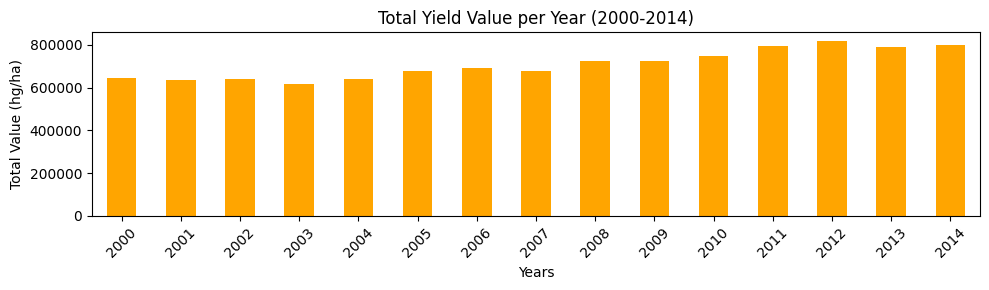

In [92]:
# Bar Chart
#Total Yield (hg/ha) from Year 2000 to 2014
yrs_filter = df[(df['Year'] >= 2000) & (df['Year'] <= 2014)]
df_year = yrs_filter.groupby('Year')['Value'].sum()

plt.figure(figsize=(10, 3))
df_year.plot(kind='bar', color='orange')
plt.title('Total Yield Value per Year (2000-2014)')
plt.xlabel('Years')
plt.ylabel('Total Value (hg/ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

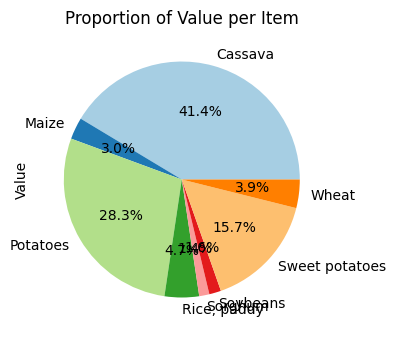

In [93]:
# Pie chart
# Group by Item and sum the values
df_item = df.groupby('Item')['Value'].sum()

plt.figure(figsize=(4, 4))
df_item.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Proportion of Value per Item')
plt.tight_layout()
plt.show()

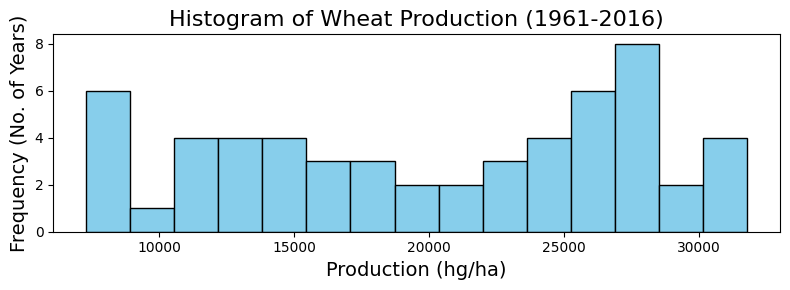

In [94]:
# HISTOGRAM for Wheat production values
wheat_data = df[(df["Item"] == "Wheat")]

plt.figure(figsize=(8, 3))
plt.hist(wheat_data["Value"], bins=15, color="skyblue", edgecolor="black")
plt.title("Histogram of Wheat Production (1961-2016)", fontsize=16)
plt.xlabel("Production (hg/ha)", fontsize=14)
plt.ylabel("Frequency (No. of Years)", fontsize=14)
plt.tight_layout()
plt.show()

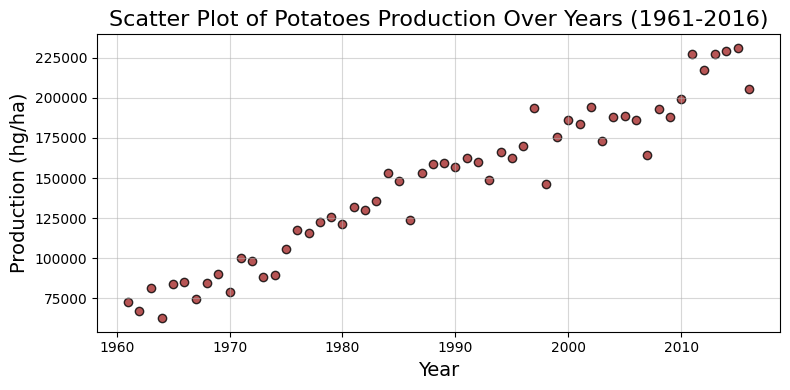

In [95]:
# Scatter plot to visualize the relationship between Year and Potatoes Production (Value)
wheat_data = df[(df["Item"] == "Potatoes")]
plt.figure(figsize=(8, 4))
plt.scatter(wheat_data["Year"], wheat_data["Value"], color="brown", edgecolor="black", alpha=0.8)
plt.title("Scatter Plot of Potatoes Production Over Years (1961-2016)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Production (hg/ha)", fontsize=14)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

<Figure size 1000x300 with 0 Axes>

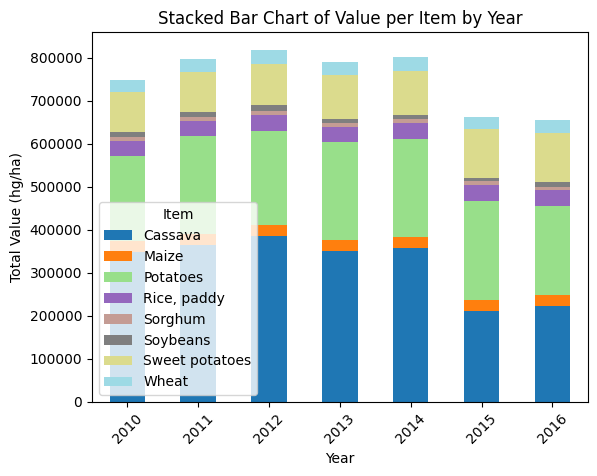

In [96]:
# Stacked bar chart Group by Year and Item, and sum the values
yearly_item = df[(df['Year'] >= 2010) & (df['Year'] <= 2016)].groupby(['Year', 'Item'])['Value'].sum().unstack()
plt.figure(figsize=(10, 3))
yearly_item.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Stacked Bar Chart of Value per Item by Year')
plt.xlabel('Year')
plt.ylabel('Total Value (hg/ha)')
plt.xticks(rotation=45)
plt.show()

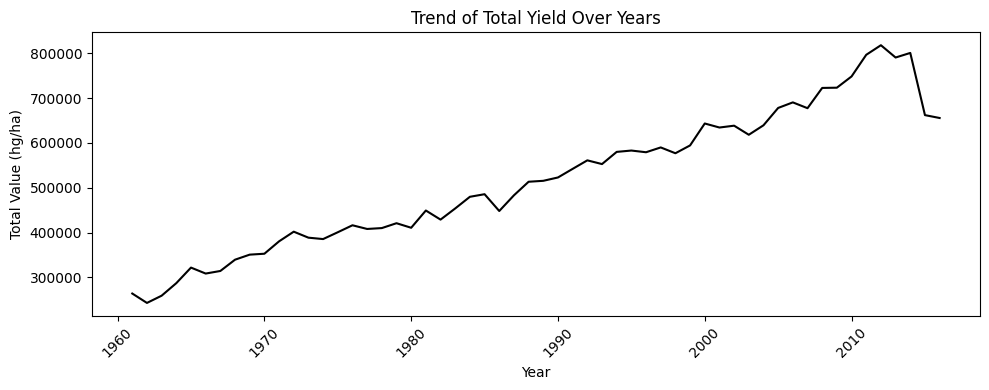

In [97]:
#Line Graph group by Year and Yield(Value)
plt.figure(figsize=(10, 4))
df.groupby('Year')['Value'].sum().plot(kind='line', color='black')
plt.title('Trend of Total Yield Over Years')
plt.xlabel('Year')
plt.ylabel('Total Value (hg/ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

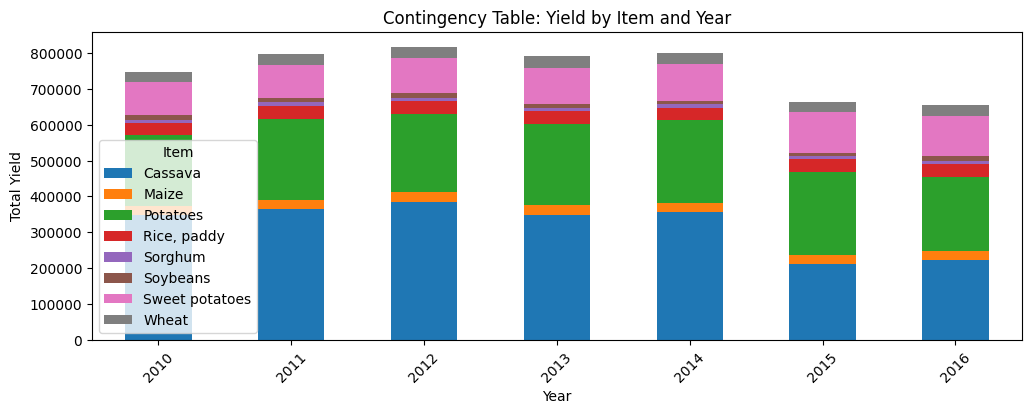

In [98]:
# Contingency table by summing the yields for each combination of 'Item' and 'Year'(2010-2016)
contingency_table = pd.pivot_table(df[(df['Year'] >= 2010) & (df['Year'] <= 2016)], values='Value', index="Year", columns='Item', 
                                   aggfunc='sum', fill_value=0)

# Stacked bar graph for Contingency Table
contingency_table.plot(kind='bar', stacked=True, figsize=(12, 4))
plt.xlabel('Year')
plt.ylabel('Total Yield')
plt.title('Contingency Table: Yield by Item and Year')
plt.xticks(rotation=45)
plt.show()

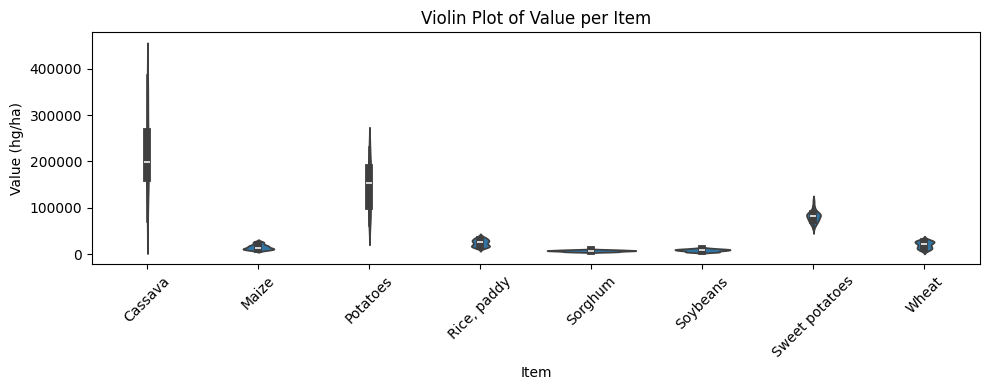

In [99]:
#Violin Plot to visualize distribution of value by item
plt.figure(figsize=(10, 4))
sns.violinplot(x='Item', y='Value', data=df)
plt.title('Violin Plot of Value per Item')
plt.xlabel('Item')
plt.ylabel('Value (hg/ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

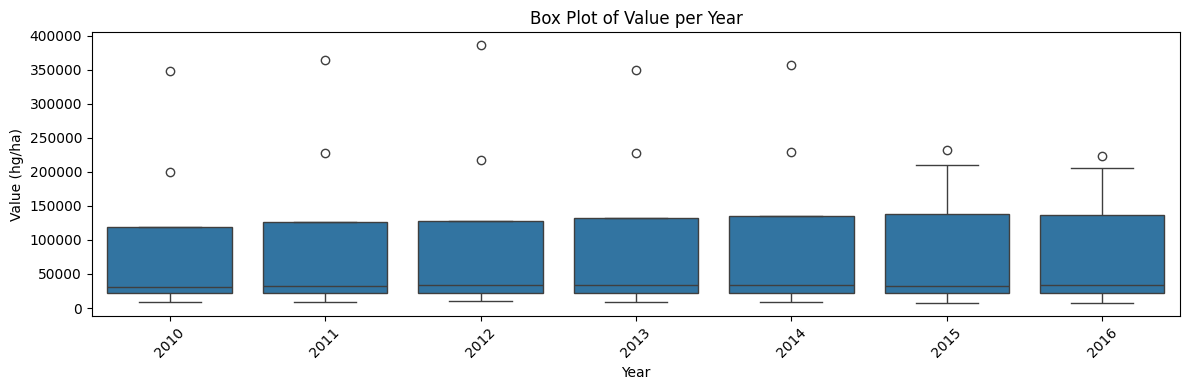

In [100]:
#Box Plot to visualize distribution of values across years(2010-2016)
plt.figure(figsize=(12, 4))
sns.boxplot(x='Year', y='Value', data=df[(df['Year'] >= 2010) & (df['Year'] <= 2016)], whis=0.7)
plt.title('Box Plot of Value per Year')
plt.xlabel('Year')
plt.ylabel('Value (hg/ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

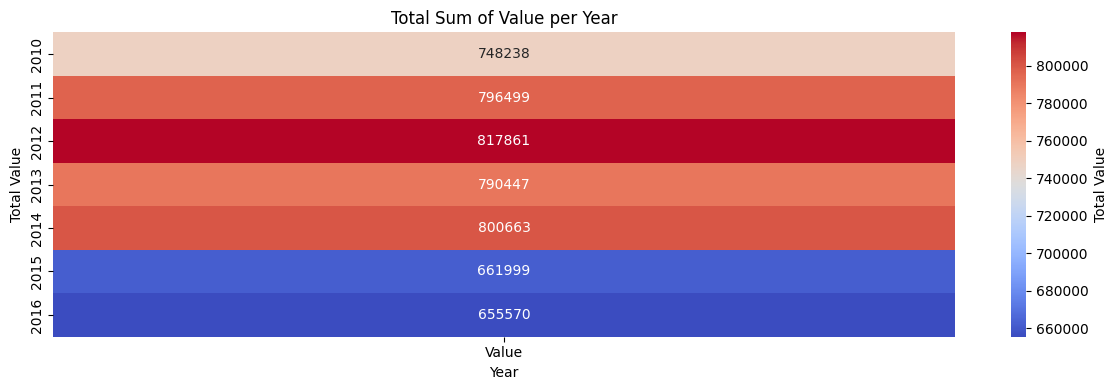

In [101]:
# Heat Map for total sum of "Value" per year (2010-2016)
per_year = df[(df['Year'] >= 2010) & (df['Year'] <= 2016)].groupby('Year')['Value'].sum().reset_index()

hm_data = per_year.pivot_table(values='Value', index='Year')
plt.figure(figsize=(12, 4))
sns.heatmap(hm_data, annot=True, cmap='coolwarm', fmt='.0f', cbar_kws={'label': 'Total Value'})
plt.title('Total Sum of Value per Year')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.tight_layout()
plt.show()